In [1]:
import seaborn as sns
from scipy.stats import spearmanr
import pandas as pd
import argparse
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from gensim.models import KeyedVectors
import os

In [2]:
 df = pd.read_csv("counts_coha_sum_of_years")


In [3]:
entities_to_consider = ["human", "man", "woman", "boy", "girl", "father", "mother", "dad", "mom", "grandfather", "grandmother", "baby", "infant", "fetus", "corpse", "dog", "puppy", "cat", "kitten", "frog", "ant", "fish", "mouse", "bird", "shark", "elephant", "beetle", "insect", "chimpanzee", "monkey", "primate"]
df = df[df["word"].isin(entities_to_consider)]


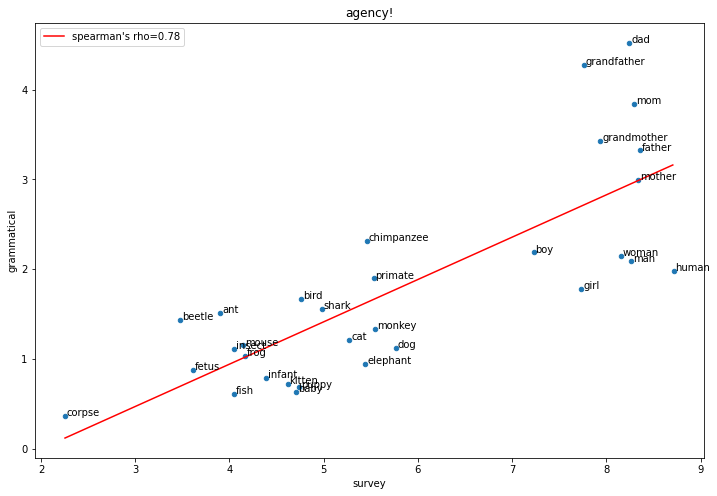

In [4]:

agency=df['agency']
df['combination(nsubj)/(dobj+nsubjpass)']=(df['nsubj'])/(df['dobj']+df['nsubjpass'])
agency_Corres=df['combination(nsubj)/(dobj+nsubjpass)']
entities=df['word']

X = agency.to_numpy()
y = agency_Corres.to_numpy()


res = spearmanr(X, y)
corr= res.correlation
pvalue =res.pvalue
corr_agency = str(np.round(corr, 2))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

        
model = LinearRegression()
model.fit(X.reshape(-1,1),y.reshape(-1,1))

coef = model.coef_
intercept = model.intercept_
 
X_line = np.arange(min(X), max(X), 0.01)
y_line = X_line * coef + intercept
y_line = y_line[0]

ax = df.plot.scatter('agency', 'combination(nsubj)/(dobj+nsubjpass)', figsize=(12,8))
label_point(agency, agency_Corres, entities, ax)


plt.plot(X_line, y_line, 'r', label="spearman's rho=" + corr_agency)

plt.xlabel('survey')
plt.ylabel('grammatical')
plt.title('agency!')
plt.legend()

In [5]:
print( spearmanr(X, y))


SpearmanrResult(correlation=0.783467741935484, pvalue=1.8748610176979626e-07)


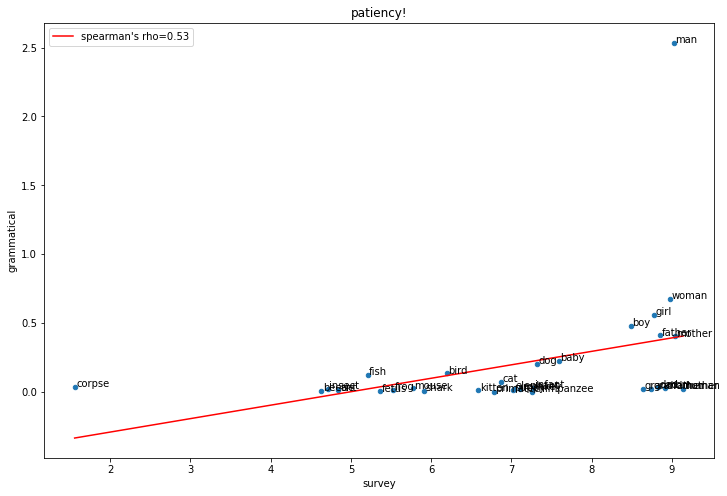

In [7]:

patiency=df['patiency']


df['dep_sum']=df['nsubj']+df['nsubjpass']+df['dobj']+df['pobj']
ave=df["dep_sum"].mean()
df['(nsubjpass+dobj)']=(df['nsubjpass']+df['dobj'])/ave


patiency_Corres=df['(nsubjpass+dobj)']

entities=df['word']

X = patiency.to_numpy()
y = patiency_Corres.to_numpy()

res = spearmanr(X, y)
corr, pvalue = res.correlation, res.pvalue
corr_patiency = str(np.round(corr, 2))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

model = LinearRegression()
model.fit(X.reshape(-1,1),y.reshape(-1,1))

coef = model.coef_
intercept = model.intercept_
 
X_line = np.arange(min(X), max(X), 0.01)
y_line = X_line * coef + intercept
y_line = y_line[0]

ax = df.plot.scatter('patiency', '(nsubjpass+dobj)', figsize=(12,8))
label_point(patiency, patiency_Corres, entities, ax)


plt.plot(X_line, y_line, 'r', label="spearman's rho=" + corr_patiency)

plt.xlabel('survey')
plt.ylabel('grammatical')
plt.title('patiency!')
plt.legend()
